In [1]:
import sys
#!{sys.executable} -m pip install sklearn
import numpy as np
import math
from matplotlib import pyplot as plt
import matplotlib
import random
import os
from matplotlib import animation
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy import spatial
from IPython.display import HTML
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic, ExpSineSquared, DotProduct, ConstantKernel)

import importlib
import scripts.theodolite_function as tfu
import scripts.theodolite_utils as tfuu
tfu = importlib.reload(tfu)
from scipy.interpolate import splprep, splev
from scipy import interpolate
import seaborn as sns
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from scipy.spatial.transform import Rotation as R
import scripts.gp_prediction_utils as GPf
GPf = importlib.reload(GPf)
import GPy

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [2]:
# Switch values if necessary 1 11 2021
#Dist_prism_12 = 1.0398341231585624*1000
#Dist_prism_13 = 0.818424700118086*1000
#Dist_prism_23 = 0.8806156053859284*1000
#Dist_GPS_12 = 0.835637436093363*1000
#Dist_GPS_13 = 0.7812173648662254*1000
#Dist_GPS_23 = 0.5166745729506486*1000

# 26 11 2021
#Dist_prism_12 = 1.03688797895733
#Dist_prism_13 = 0.822536135483593
#Dist_prism_23 = 0.8783765747673403
#Dist_GPS_12 = 0.7828618536473139
#Dist_GPS_13 = 0.8394208131018045
#Dist_GPS_23 = 0.5176447366930409

# 31 01 2022
#Dist_prism_12 = 1.038854051807371
#Dist_prism_13 = 0.8202157646292075
#Dist_prism_23 = 0.879788333022114
#Dist_GPS_12 = 0.7830826912858335
#Dist_GPS_13 = 0.8418404054627937
#Dist_GPS_23 = 0.5172558618541933
     
# 03 02 2022
#Dist_prism_12 = 1.0403741344089559
#Dist_prism_13 = 0.8239475424257701
#Dist_prism_23 = 0.8766711748547112
#Dist_GPS_12 = 0.781661929058067
#Dist_GPS_13 = 0.8353981332464246
#Dist_GPS_23 = 0.5174987476948135

# 17 02 2022 / 24 02 2022
Dist_prism_12_240222 = 0.8882613537922258
Dist_prism_13_240222 = 0.8262903370535766
Dist_prism_23_240222 = 1.0377436460567973
Dist_GPS_12_240222 = 0.7809786915630756
Dist_GPS_13_240222 = 0.8378323585433202
Dist_GPS_23_240222 = 0.5191788936274444   

# 07 03 2022
Dist_prism_12_070322 = 0.8832836583456264
Dist_prism_13_070322 = 0.8247449387008166
Dist_prism_23_070322 = 1.039409793600046
Dist_GPS_12_070322 = 0.7781099344563802
Dist_GPS_13_070322 = 0.8431026980109139
Dist_GPS_23_070322 = 0.5157221841320069

# 12 03 2022
Dist_prism_12_120322 = 0.8860734460339026
Dist_prism_13_120322 = 0.8303896290142598
Dist_prism_23_120322 = 1.0393117663247973
Dist_GPS_12_120322 = 0.7829424296161074
Dist_GPS_13_120322 = 0.8415176433032493
Dist_GPS_23_120322 = 0.5161917038941966

# 14 03 2022 / 16 03 2022
Dist_prism_12_140322 = 0.8873171656784946
Dist_prism_13_140322 = 0.8272212117473343
Dist_prism_23_140322 = 1.0379270641796363
Dist_GPS_12_140322 = 0.7829081036179948
Dist_GPS_13_140322 = 0.8424633975958637
Dist_GPS_23_140322 = 0.5165807364575292

# 31 03 2022
Dist_prism_12_310322 = 0.8873171656784946
Dist_prism_13_310322 = 0.8272212117473343
Dist_prism_23_310322 = 1.0379270641796363
Dist_GPS_12_310322 = 0.7829081036179948
Dist_GPS_13_310322 = 0.8424633975958637
Dist_GPS_23_310322 = 0.5165807364575292

Inter_distance = [[Dist_prism_12_240222,Dist_prism_13_240222,Dist_prism_23_240222,Dist_GPS_12_240222,Dist_GPS_13_240222,Dist_GPS_23_240222],
                 [Dist_prism_12_070322,Dist_prism_13_070322,Dist_prism_23_070322,Dist_GPS_12_070322,Dist_GPS_13_070322,Dist_GPS_23_070322],
                 [Dist_prism_12_120322,Dist_prism_13_120322,Dist_prism_23_120322,Dist_GPS_12_120322,Dist_GPS_13_120322,Dist_GPS_23_120322],
                 [Dist_prism_12_140322,Dist_prism_13_140322,Dist_prism_23_140322,Dist_GPS_12_140322,Dist_GPS_13_140322,Dist_GPS_23_140322],
                 [Dist_prism_12_140322,Dist_prism_13_140322,Dist_prism_23_140322,Dist_GPS_12_140322,Dist_GPS_13_140322,Dist_GPS_23_140322],
                 [Dist_prism_12_310322,Dist_prism_13_310322,Dist_prism_23_310322,Dist_GPS_12_310322,Dist_GPS_13_310322,Dist_GPS_23_310322],]

print(Inter_distance[0])

[0.8882613537922258, 0.8262903370535766, 1.0377436460567973, 0.7809786915630756, 0.8378323585433202, 0.5191788936274444]


In [3]:
# Sort data for 2.5D plot
tfu = importlib.reload(tfu)
tfuu = importlib.reload(tfuu)
linear_speed_list = []
angular_speed_list = []
accel_list = []
mean_error_prisms_list = []

list_dataset_GP = ["./data/prediction/TS/20220224/", 
                   "./data/prediction/TS/20220307/", 
                   "./data/prediction/TS/20220312/",
                   "./data/prediction/TS/20220314/", 
                   "./data/prediction/TS/20220316/", 
                   "./data/prediction/TS/20220331-1/",
                   "./data/prediction/TS/20220331-2/"]

list_calib = ["./data/total_station/20220224/20220224_theodolite_reference_prisms.txt",
              "./data/total_station/20220307/theodolite_reference_prisms.txt",
              "./data/total_station/20220312/theodolite_reference_prisms.txt",
              "./data/total_station/20220314/theodolite_reference_prisms.txt",
              "./data/total_station/20220316/theodolite_reference_prisms.txt",
              "./data/total_station/20220331-1/theodolite_reference_prisms.txt",
              "./data/total_station/20220331-2/theodolite_reference_prisms.txt"]

list_rosbag = ["/home/norlab/Data/IROS_2022/20220224_TS/2022-02-24-15-34-38.bag",
               "/home/norlab/Data/IROS_2022/20220307_TS/2022-03-07-19-20-06.bag",
               "/home/norlab/Data/IROS_2022/20220312_TS/2022-03-12-09-45-12.bag",
               "/home/norlab/Data/IROS_2022/20220314_TS/2022-03-14-10-47-49.bag",
               "/home/norlab/Data/IROS_2022/20220316_TS/2022-03-16-19-02-42.bag",
               "/home/norlab/Data/IROS_2022/20220331_TS/2022-03-31-10-22-52.bag",
               "/home/norlab/Data/IROS_2022/20220331_TS/2022-03-31-11-20-05.bag"]

speed_l = []
angular_l = []
accel_l = []
error_l = []
for path,file_rosbag_theodolite,inter_dist in zip(list_dataset_GP,list_rosbag, Inter_distance):
    linear_speed_list, angular_speed_list, accel_list, mean_error_prisms_list = tfu.process_data_TS(path, inter_dist, file_rosbag_theodolite)
    speed_l = speed_l + linear_speed_list
    angular_l = angular_l + angular_speed_list
    accel_l = accel_l + accel_list
    error_l = error_l + mean_error_prisms_list
    print(len(error_l))

Linear velocity reading
Angular velocity reading
Finish !
33621
Linear velocity reading
Angular velocity reading
Finish !
78576
Linear velocity reading
Angular velocity reading
Finish !
128112
Linear velocity reading
Angular velocity reading
Finish !
177618
Linear velocity reading
Angular velocity reading
Finish !
213792
Linear velocity reading
Angular velocity reading
Finish !
239427


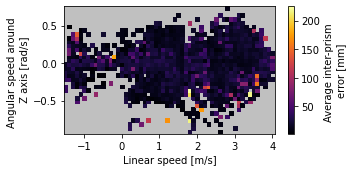

In [7]:
#print(linear_speed_list)
#print(angular_speed_list)
#print(mean_error_prisms_list)
# make these smaller to increase the resolution
tfu = importlib.reload(tfu)
dx, dy = 0.1, 0.05
save_fig = True
#name_file = "grid_plot_linear_angular_velocities_ski_trail.jpg"
name_file = "./figs/speed_rotations.pdf"
tfu.plot_grid_speed_angular_result(dx, dy, error_l, speed_l, angular_l, save_fig, name_file, True, 0)
#tfu.plot_grid_speed_angular_result(dx, dy, mean_error_prisms_list, accel_list, angular_speed_list, save_fig, name_file, False, 0)

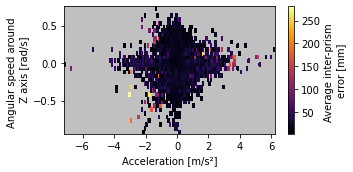

In [8]:
name_file = "./figs/accel_rotations.pdf"
dx, dy = .3, 0.05
save_fig = False
tfu.plot_grid_speed_angular_result(dx, dy, error_l, accel_l, angular_l, save_fig, name_file, False, 0)

In [ ]:
tfuu = importlib.reload(tfuu)
speed, accel = tfu.read_rosbag_imu_node(list_rosbag[0], True)

In [ ]:
tfuu = importlib.reload(tfuu)
angular_speed = tfuu.read_rosbag_imu_data(list_rosbag[0], True)
print(angular_speed[0])

In [ ]:
path = list_dataset_GP[0]
prefix = "GP-10-20"
P1 = np.array(tfu.read_prediction_data_csv_file(path + prefix + "_1.csv"))
P2 = np.array(tfu.read_prediction_data_csv_file(path + prefix + "_2.csv"))
P3 = np.array(tfu.read_prediction_data_csv_file(path + prefix + "_3.csv"))

dist_prism = []
origin = 0
for i in range(0, len(P1[:, 0])):
    dp1 = abs(np.linalg.norm(P1[i, 1:4] - P2[i, 1:4]) - Inter_distance[0][0])*1000
    dp2 = abs(np.linalg.norm(P1[i, 1:4] - P3[i, 1:4]) - Inter_distance[0][1])*1000
    dp3 = abs(np.linalg.norm(P3[i, 1:4] - P2[i, 1:4]) - Inter_distance[0][2])*1000
    dist_prism.append(np.array([P1[i, 0] - origin, dp1, dp2, dp3]))
dist_prism = np.array(dist_prism)

In [ ]:
print(speed[0])
print(dist_prism[0])
speed_arr = np.array(speed)
angular_arr = np.array(angular_speed)
dist_prism_arr = np.array(dist_prism)


In [ ]:
%matplotlib notebook
plt.figure(0)
plt.scatter(speed_arr[:,0], speed_arr[:,1], color='b')
plt.figure(0)
plt.scatter(angular_arr[:,0], angular_arr[:,1], color='g')
plt.figure(1)
plt.scatter(dist_prism_arr[:,0], dist_prism_arr[:,1], color='r')